In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
recipes=pd.read_csv('F:\Study Material\DataForDatascience\Ingredients.csv')
list(recipes.columns)

['Type',
 'Flour',
 'Milk',
 'Sugar',
 'Butter',
 'Egg',
 'Baking Powder',
 'Vanilla',
 'Salt']

In [3]:
recipes.head(4)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Waffles,55,27,4,7,4,1,-2,1
1,Waffles,48,25,13,8,11,0,1,-2
2,Waffles,46,22,16,8,5,-1,1,0
3,Waffles,49,23,12,8,3,1,2,1


In [4]:
recipes.tail(4)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
14,Cake,35,14,20,13,9,4,3,0
15,Cake,39,17,33,9,7,2,2,-1
16,Cake,36,16,24,11,11,2,-1,2
17,Cake,36,19,23,9,14,0,1,-1


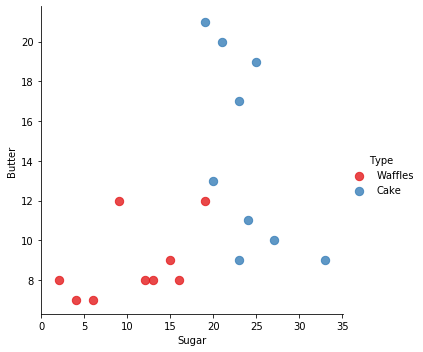

In [5]:
#let's first plot two ingredients
sns.lmplot('Sugar','Butter',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70})

In [6]:
sugar_butter=recipes[['Sugar','Butter']].as_matrix()
type_label=np.where(recipes['Type']=='Waffles',0,1)

C:\Users\Finch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [7]:
model=svm.SVC(kernel='linear')

In [8]:
model.fit(sugar_butter, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(5,30)
yy=a*xx-(model.intercept_[0])/w[1]
b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])

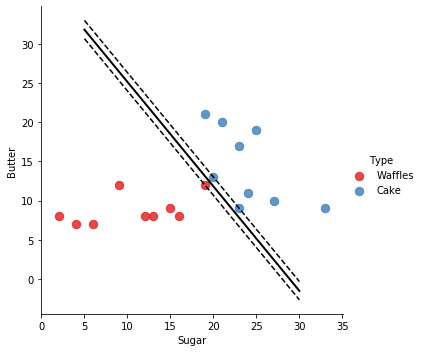

In [10]:
sns.lmplot('Sugar','Butter',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=80,facecolors='none')

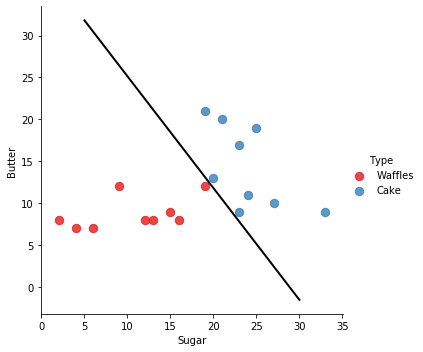

In [11]:
sns.lmplot('Sugar','Butter',data=recipes, hue='Type',
           palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')

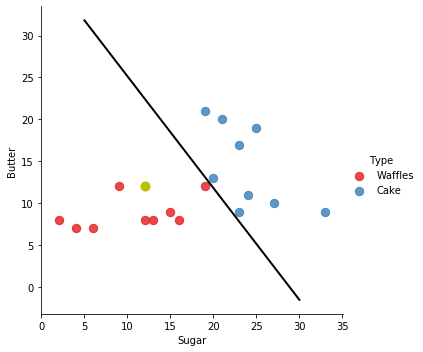

In [12]:
#Predict New Cases
sns.lmplot('Sugar','Butter',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(12,12,'yo',markersize='9')

In [14]:
def waffle_or_cake (butter,sugar):
    if(model.predict([[butter,sugar]]))==0:
        print('You are looking at Waffles recipe')
    else:
        print('you are looking at Cake recipe')
        

In [15]:
waffle_or_cake(24,12)

you are looking at Cake recipe
